<a href="https://colab.research.google.com/github/moaaztaha/Comparing-BLEU-scores-with-and-without-Arabert-preprocessing/blob/main/Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
!git clone https://github.com/aub-mind/arabert
!git clone https://github.com/moaaztaha/Comparing-BLEU-scores-with-and-without-Arabert-preprocessing
os.system("mv  -v /content/Comparing-BLEU-scores-with-and-without-Arabert-preprocessing/* .")
!pip install -r requirements.txt

fatal: destination path 'arabert' already exists and is not an empty directory.
fatal: destination path 'Comparing-BLEU-scores-with-and-without-Arabert-preprocessing' already exists and is not an empty directory.


In [3]:
# Modules
import ipywidgets as widgets
from ipywidgets import interact_manual
import matplotlib.pyplot as plt
import pandas as pd

# needed to use matplotlib with jupyter widgets
%matplotlib notebook

from IPython.display import display, clear_output, Image
import warnings
warnings.filterwarnings("ignore")

from utils import calculate_scores
%matplotlib inline

[2022-02-28 09:12:43,261 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


In [4]:
# Create the widgets
left = widgets.Button(description='Left')
right = widgets.Button(description='Right')
out = widgets.Output()

# # test on flickr test set
# DATA_PATH = 'test_images/'
# DF_PATH = 'ar_data.json'
# full_df = pd.read_json('results_comparison.json')

# test sample of 200 image
DATA_PATH = 'images_200/'
DF_PATH = 'sm_ar_data.json'
full_df = pd.read_json('results_comparison_200.json')

print(full_df.shape)
# Setting the first and last indexs
i=0 # starting index
i_max = full_df.shape[0] # ending index


with out:
    clear_output()
    display(Image(f'{DATA_PATH}/{full_df.iloc[i, 0]}'))
    display(full_df.iloc[i:i+1].drop('file_name', axis=1))
    display(calculate_scores(full_df.iloc[i], DF_PATH))

# plots the next image
def plot_next(*args):
    global i
    i += 1
    # stop
    if i >= i_max: 
        i=0

    with out:
        clear_output()
        display(Image(f'{DATA_PATH}/{full_df.iloc[i, 0]}'))
        display(full_df.iloc[i:i+1].drop('file_name', axis=1))
        display(calculate_scores(full_df.iloc[i], DF_PATH))

def plot_previous(*args):
    global i
    i -= 1
    # stop
    if i < 0: 
        i = full_df.shape[0] -1

    with out:
        clear_output()
        display(Image(f'{DATA_PATH}/{full_df.iloc[i, 0]}'))
        display(full_df.iloc[i:i+1].drop('file_name', axis=1))
        display(calculate_scores(full_df.iloc[i], DF_PATH))
    
    
# attaching the buttons to their callback functions         
right.on_click(plot_next)
left.on_click(plot_previous)

# showing the widgets
vb1 = widgets.VBox([right, left])
vb2 = widgets.VBox([out])
widgets.HBox([vb1, vb2])

(198, 7)


In [5]:
# 

In [6]:
temp = calculate_scores(full_df.iloc[i], DF_PATH).iloc[:, :2]
temp

,Exp,b1
0,old model with old preprocessing,9.197
1,new model with arabert preprcessing,27.645
2,old model with arabert preprocessing,9.444
3,new model with old preprocessing,18.888
4,_,_


In [7]:
temp = temp.transpose()
temp

,0,1,2,3,4
Exp,old model with old preprocessing,new model with arabert preprcessing,old model with arabert preprocessing,new model with old preprocessing,_
b1,9.197,27.645,9.444,18.888,_


In [8]:
temp.columns = temp.iloc[0]
temp = temp[1:]
temp


Exp,old model with old preprocessing,new model with arabert preprcessing,old model with arabert preprocessing,new model with old preprocessing,_
b1,9.197,27.645,9.444,18.888,_


In [9]:
temp.drop('_', axis=1)

Exp,old model with old preprocessing,new model with arabert preprcessing,old model with arabert preprocessing,new model with old preprocessing
b1,9.197,27.645,9.444,18.888


In [11]:
calculate_scores(full_df.iloc[i], DF_PATH, manu=True)

(['old model with old preprocessing',
  'new model with arabert preprcessing',
  'old model with arabert preprocessing',
  'new model with old preprocessing'],
 [9.197, 27.645, 9.444, 18.888],
 [18.394, 27.645, 8.447, 18.888],
 [23.175, 25.664, 6.958, 18.888],
 [26.013, 21.986, 8.931, 18.888])

In [17]:
from tqdm import tqdm
import matplotlib.pyplot as plt

100%|██████████| 198/198 [00:12<00:00, 16.17it/s]


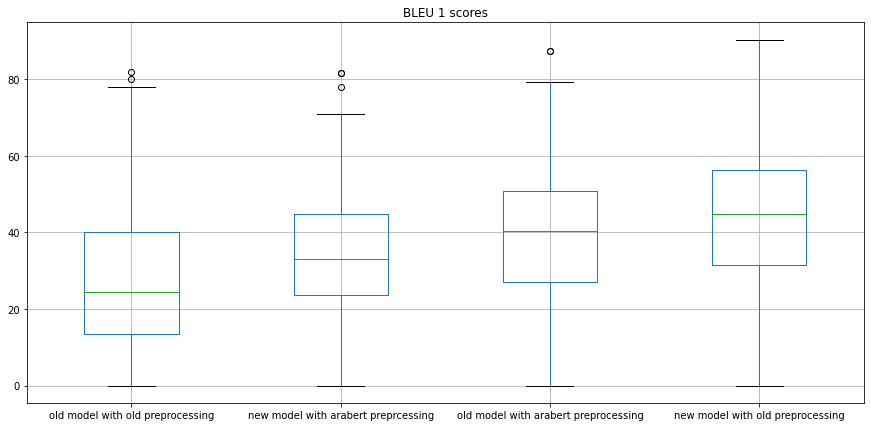

100%|██████████| 198/198 [00:05<00:00, 35.63it/s]


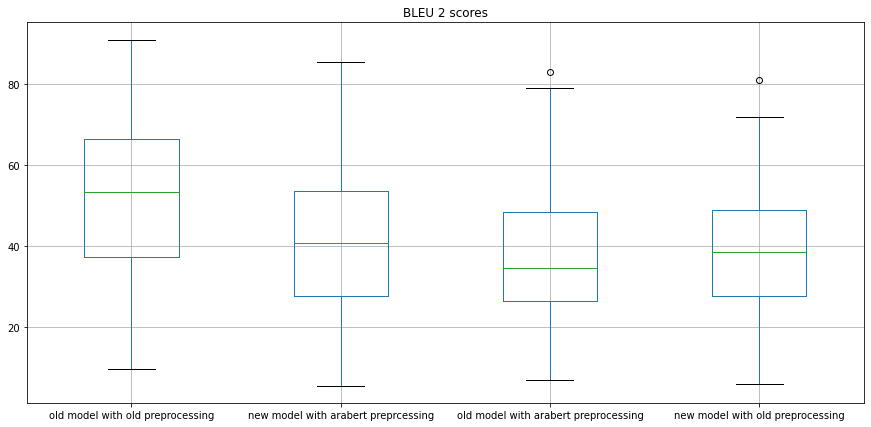

100%|██████████| 198/198 [00:05<00:00, 37.44it/s]


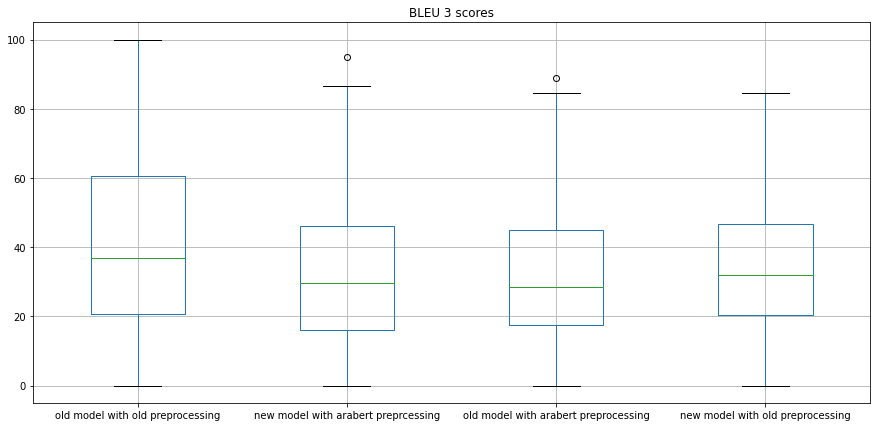

100%|██████████| 198/198 [00:04<00:00, 39.69it/s]


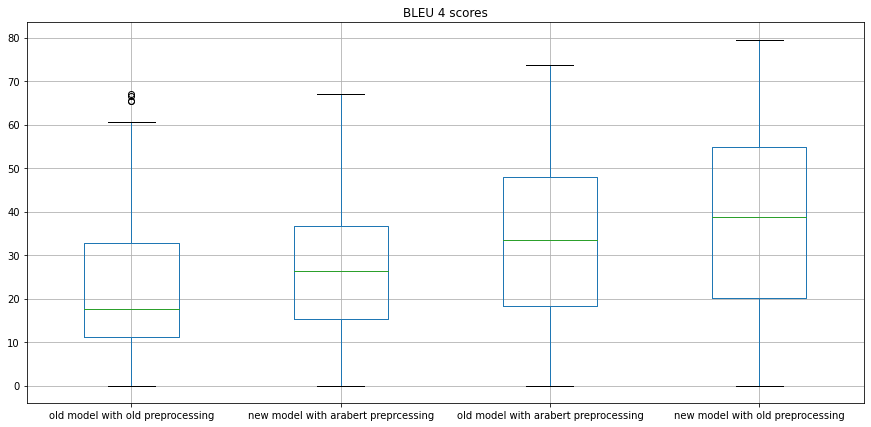

In [34]:
# bs
for b in range(4):
  om_op_b1s = []
  nm_ap_b1s = []
  om_ap_b1s = []
  nm_op_b1s = []
  for i in tqdm(range(full_df.shape[0])):
    output = calculate_scores(full_df.iloc[i], DF_PATH, manu=True)
    om_op_b1s.append(output[1][b])
    nm_ap_b1s.append(output[2][b])
    om_ap_b1s.append(output[3][b])
    nm_op_b1s.append(output[4][b])
  bs = pd.DataFrame({'old model with old preprocessing': om_op_b1s, 'new model with arabert preprcessing': nm_ap_b1s, 'old model with arabert preprocessing': om_ap_b1s, 'new model with old preprocessing': nm_op_b1s})
  bs.boxplot(figsize=(15, 7))
  plt.title(f'BLEU {b+1} scores')
  plt.show()